# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

longitude=[]
latitude=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
city_na = []
found_city=[]

for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        response = requests.get(query_url)
        weather_response = response.json()
        longitude.append(weather_response['coord']['lon'])
        latitude.append(weather_response['coord']['lat'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        found_city.append(city)
        print(city)
    except:
        city_na.append(city)
    



mitsamiouli
grand gaube
castro
albany
mar del plata
icoana
pevek
sioux lookout
hilo
butaritari
denpasar
rio gallegos
barrow
parrita
ushuaia
bandar-e lengeh
ropczyce
astaneh-ye ashrafiyeh
severo-kurilsk
hithadhoo
puerto del rosario
ilhabela
hobart
aswan
kapaa
korla
skjervoy
punta arenas
mataura
provideniya
rikitea
bredasdorp
qaanaaq
nome
guerrero negro
labuhan
thompson
saint-philippe
kahului
leningradskiy
jamestown
hudson bay
red bluff
sao filipe
aklavik
vaini
arraial do cabo
bethel
saint george
saint-pierre
baiyin
hermanus
ahipara
kaitangata
cherskiy
pontes e lacerda
vila franca do campo
busselton
atuona
narsaq
linxia
cape town
lebu
avarua
baykit
batemans bay
aktau
kavieng
fortuna
krasnoselkup
havre-saint-pierre
kodiak
yarmouth
sturgeon falls
otradnoye
bilma
khuzhir
ha giang
brigantine
vacaria
hay river
tuktoyaktuk
fagernes
urucara
namibe
port alfred
taoudenni
brenham
pombas
bara
east london
dembi dolo
milin
bengkulu
mount gambier
ketchikan
torbay
mozarlandia
shieli
baker city
hokitika

In [5]:
weather_response = response.json()
weather_response

{'coord': {'lon': 111.6522, 'lat': 40.8106},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 10.4,
  'feels_like': 0.18,
  'temp_min': 10.4,
  'temp_max': 10.4,
  'pressure': 1018,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 6.71, 'deg': 40},
 'clouds': {'all': 0},
 'dt': 1612462226,
 'sys': {'type': 1,
  'id': 9612,
  'country': 'CN',
  'sunrise': 1612481991,
  'sunset': 1612518895},
 'timezone': 28800,
 'id': 2036892,
 'name': 'Hohhot',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({'City': found_city,
                           'Longitude': longitude,
                           'Latitude': latitude,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})
weather_df

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mitsamiouli,43.2844,-11.3847,83.61,68,39,4.50,KM,1612462128
1,grand gaube,57.6608,-20.0064,80.01,74,0,5.99,MU,1612462131
2,castro,-50.0119,-24.7911,78.04,80,41,9.89,BR,1612462131
3,albany,-73.9662,42.6001,37.00,49,7,7.00,US,1612461955
4,mar del plata,-57.5575,-38.0023,71.60,64,20,20.71,AR,1612462028
...,...,...,...,...,...,...,...,...,...
571,nantucket,-70.0995,41.2835,37.40,70,75,13.80,US,1612462157
572,jahangirabad,78.1000,28.4167,54.03,93,80,5.01,IN,1612462225
573,ainazi,24.3578,57.8636,20.71,94,100,9.71,LV,1612462226
574,gourcy,-2.3500,13.2167,85.14,13,37,5.50,BF,1612462226


In [10]:
weather_df.loc[weather_df['Humidity']>100]

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
weather_df.to_csv(output_data_file,index=False)

In [15]:
weather_df.describe()


,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,16.912850,20.873613,50.380677,70.439236,51.666667,8.401858,1.612462e+09
std,92.083216,33.390334,32.742534,20.611853,38.525700,6.198391,7.914483e+01
min,-175.200000,-54.800000,-50.800000,8.000000,0.000000,0.400000,1.612462e+09
25%,-64.833225,-8.091700,33.800000,59.000000,12.750000,4.127500,1.612462e+09
50%,21.158900,26.737300,59.155000,75.000000,51.500000,6.910000,1.612462e+09
75%,98.934425,48.720350,77.000000,86.000000,90.000000,11.180000,1.612462e+09
max,179.316700,78.218600,99.840000,100.000000,100.000000,41.430000,1.612462e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

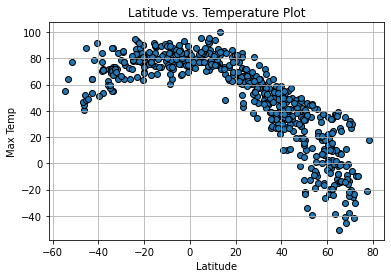

In [31]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/Lat_v_Temp.png')

## Latitude vs. Humidity Plot

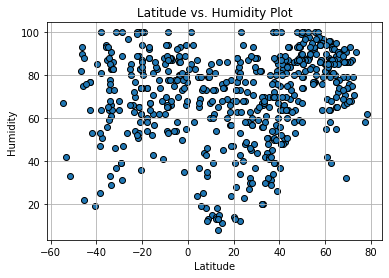

In [32]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('output_data/Lat_v_Hum.png')

## Latitude vs. Cloudiness Plot

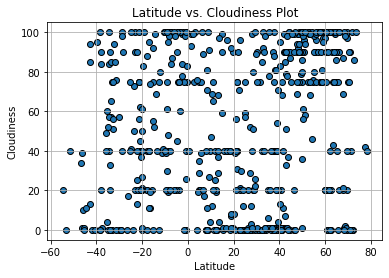

In [33]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('output_data/Lat_v_Cloud.png')

## Latitude vs. Wind Speed Plot

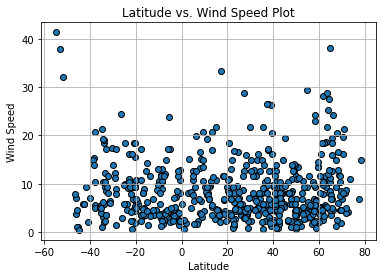

In [34]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('output_data/Lat_v_Wind.png')

## Linear Regression

In [98]:
def plot_regression(x_values,y_values,text_location):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f'y={round(slope,2)}x + {round(intercept,2)}'
    plt.scatter(x_values,y_values)
    plt.plot(x_values,predicted_y,c='r')
    plt.annotate(line_equation,text_location,c='r',fontsize=15)
    plt.grid()
    print(f'R value is: {rvalue}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R value is: -0.8766868990143304


Text(0, 0.5, 'Max Temp')

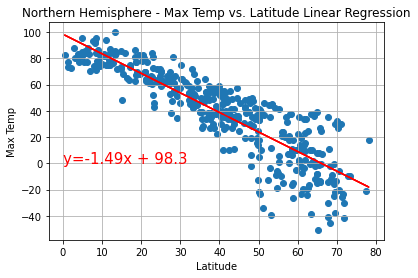

In [99]:
northern_hemi=weather_df[weather_df['Latitude']>0]
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Max Temp']
plot_regression(x_values,y_values,text_location=(0,0))
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R value is: 0.5172374432630595


Text(0, 0.5, 'Max Temp')

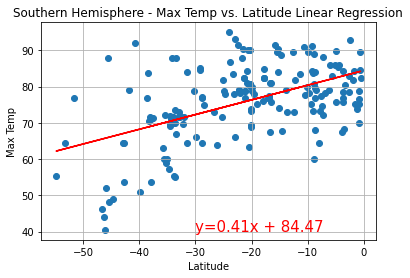

In [100]:
southern_hemi=weather_df[weather_df['Latitude']<0]
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Max Temp']
plot_regression(x_values,y_values,(-30,40))
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value is: 0.4453290369894076


Text(0, 0.5, 'Humidity')

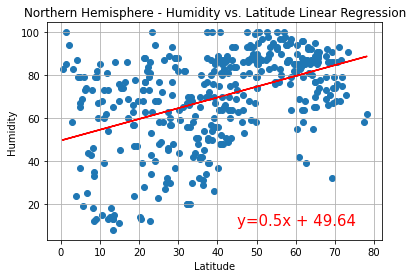

In [101]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Humidity']
plot_regression(x_values,y_values,(45,10))
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value is: 0.18337489022707168


Text(0, 0.5, 'Humidity')

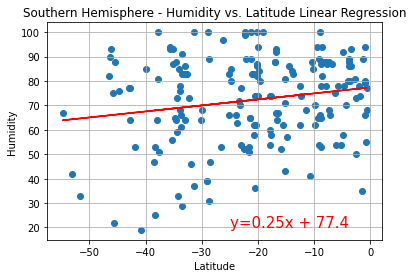

In [102]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Humidity']
plot_regression(x_values,y_values,(-25,20))
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value is: 0.3335443103695167


Text(0, 0.5, 'Cloudiness')

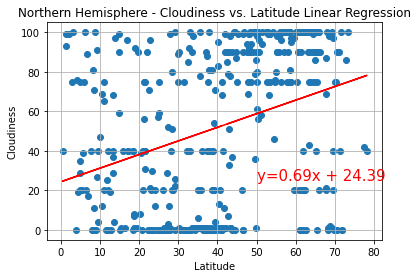

In [103]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Cloudiness']
plot_regression(x_values,y_values,(50,25))
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value is: 0.32673313302440365


Text(0, 0.5, 'Cloudiness')

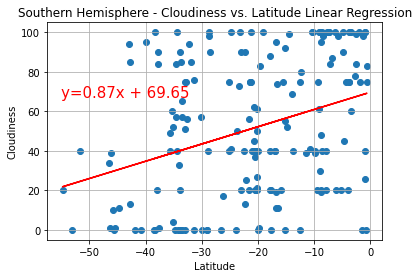

In [104]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Cloudiness']
plot_regression(x_values,y_values,(-55,67))
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value is: 0.07737820850219665


Text(0, 0.5, 'Wind Speed (mph)')

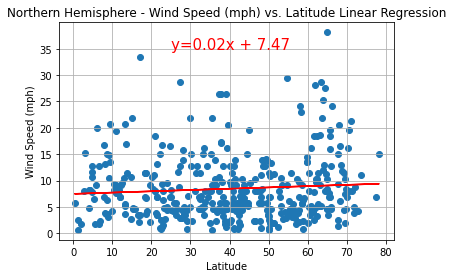

In [105]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Wind Speed']
plot_regression(x_values,y_values,(25,35))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value is: -0.2595495837150351


Text(0, 0.5, 'Wind Speed (mph)')

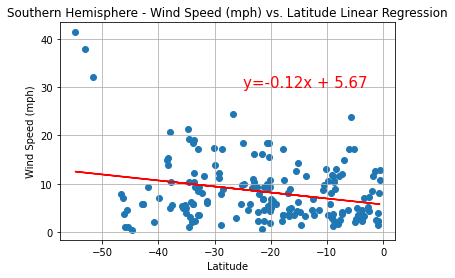

In [106]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Wind Speed']
plot_regression(x_values,y_values,(-25,30))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')